In [96]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# Question 1

In [97]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [98]:
# XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])


In [99]:
model = keras.Sequential([
    layers.Dense(2, input_shape=(2,), activation='sigmoid'),  # Hidden layer with 2 neurons
    layers.Dense(1, activation='sigmoid')  # Output layer
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
# Train the model
history = model.fit(X, y, epochs=1000, verbose=0)

In [102]:
loss = history.history['loss'][-1]
print(f"Final loss: {loss:.4f}")

Final loss: 0.6944


In [103]:
final_acc = history.history['accuracy'][-1]
print(f"'accuracy': {final_acc}")

'accuracy': 0.75


In [104]:
# Get hidden layer outputs
hidden_layer = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.layers[0].output
)
hidden_outputs = hidden_layer.predict(X)

print("\nHidden layer outputs:")
for i, x in enumerate(X):
    print(f"Input {x}: {hidden_outputs[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Hidden layer outputs:
Input [0 0]: [0.40409234 0.4323188 ]
Input [0 1]: [0.5045859  0.26012775]
Input [1 0]: [0.4437939 0.5218574]
Input [1 1]: [0.5451287 0.335052 ]


In [105]:
# Get weights
weights = model.get_weights()
print("\nNetwork Parameters:")
print("Hidden layer weights:\n", weights[0])
print("Hidden layer biases:\n", weights[1])
print("Output layer weights:\n", weights[2])
print("Output layer biases:\n", weights[3])


Network Parameters:
Hidden layer weights:
 [[ 0.16266347  0.35988143]
 [ 0.4067861  -0.77290803]]
Hidden layer biases:
 [-0.38844198 -0.27239645]
Output layer weights:
 [[-0.450724  ]
 [-0.57536983]]
Output layer biases:
 [0.4240073]


In [106]:
def train_and_evaluate(initializer, name):
    model = keras.Sequential([
        layers.Dense(2, input_shape=(2,), activation='sigmoid',
                    kernel_initializer=initializer),
        layers.Dense(1, activation='sigmoid',
                    kernel_initializer=initializer)
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy',
                 metrics=['accuracy'])
    history = model.fit(X, y, epochs=1000, verbose=0)

    loss = history.history['loss'][-1]
    predictions = model.predict(X)
    weights = model.get_weights()

    print(f"\n{name} Initializer:")
    print(f"Final loss: {loss:.4f}")
    print("Predictions:", predictions.flatten())
    print("Hidden layer weights:\n", weights[0])

    return loss

In [107]:
# Try different initializers
initializers = {
    'random_normal': keras.initializers.RandomNormal(mean=0., stddev=1.),
    'glorot_uniform': keras.initializers.GlorotUniform(),
    'he_normal': keras.initializers.HeNormal()
}

In [108]:
for name, init in initializers.items():
    train_and_evaluate(init, name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

random_normal Initializer:
Final loss: 0.6858
Predictions: [0.4822239  0.41115075 0.5768712  0.47588775]
Hidden layer weights:
 [[ 0.24262619  1.1578802 ]
 [-0.16099453 -1.197623  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

glorot_uniform Initializer:
Final loss: 0.6677
Predictions: [0.40766227 0.5057922  0.51703656 0.55315363]
Hidden layer weights:
 [[-1.294547  -1.6853507]
 [-1.5979136 -1.1665535]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

he_normal Initializer:
Final loss: 0.6936
Predictions: [0.492939   0.48480552 0.51269543 0.5050474 ]
Hidden layer weights:
 [[-0.51322436 -0.41765356]
 [-0.14845228  0.18100645]]


In [109]:
model = keras.Sequential([
    layers.Dense(4, input_shape=(2,)),  # More neurons
    layers.BatchNormalization(),
    layers.Activation('sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1),  # Different optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X, y, epochs=1000, batch_size=4, verbose=0)


In [110]:
predictions = model.predict(X)
print("\nPredictions vs Expected:")
for x, pred, expected in zip(X, predictions, y):
    print(f"Input: {x}, Predicted: {pred[0]:.3f}, Expected: {expected[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Predictions vs Expected:
Input: [0 0], Predicted: 0.309, Expected: 0
Input: [0 1], Predicted: 0.748, Expected: 1
Input: [1 0], Predicted: 0.741, Expected: 1
Input: [1 1], Predicted: 0.185, Expected: 0


In [111]:
# Get hidden layer outputs
hidden_layer = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.layers[0].output
)
hidden_outputs = hidden_layer.predict(X)

print("\nHidden layer outputs:")
for i, x in enumerate(X):
    print(f"Input {x}: {hidden_outputs[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Hidden layer outputs:
Input [0 0]: [-7.4504691e-10  2.9802227e-09 -3.8743011e-08 -3.0919924e-08]
Input [0 1]: [-0.8208516  -0.6453558   0.36119667  0.4742292 ]
Input [1 0]: [ 0.4747094  -0.63303125 -0.41342193 -0.3961833 ]
Input [1 1]: [-0.34614223 -1.2783871  -0.05222524  0.0780459 ]


In [112]:
# Get weights
weights = model.get_weights()
print("\nNetwork Parameters:")
print("Hidden layer weights:\n", weights[0])
print("Hidden layer biases:\n", weights[1])
print("Output layer weights:\n", weights[2])
print("Output layer biases:\n", weights[3])


Network Parameters:
Hidden layer weights:
 [[ 0.4747094  -0.63303125 -0.4134219  -0.39618328]
 [-0.8208516  -0.6453558   0.3611967   0.47422922]]
Hidden layer biases:
 [-7.4504691e-10  2.9802227e-09 -3.8743011e-08 -3.0919924e-08]
Output layer weights:
 [1.4629861 1.9548856 3.0822663 2.5284338]
Output layer biases:
 [ 0.76678735  1.5171884   2.0977726  -1.7025784 ]


In [113]:
def train_and_evaluate(initializer, name):
    model = keras.Sequential([
    layers.Dense(4, input_shape=(2,)),  # More neurons
    layers.BatchNormalization(),
    layers.Activation('sigmoid'),
    layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.1),  # Different optimizer
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(X, y, epochs=1000, verbose=0)

    loss = history.history['loss'][-1]
    predictions = model.predict(X)
    weights = model.get_weights()

    print(f"\n{name} Initializer:")
    print(f"Final loss: {loss:.4f}")
    print("Predictions:", predictions.flatten())
    print("Hidden layer weights:\n", weights[0])

    return loss

In [114]:
# Try different initializers
initializers = {
    'random_normal': keras.initializers.RandomNormal(mean=0., stddev=1.),
    'glorot_uniform': keras.initializers.GlorotUniform(),
    'he_normal': keras.initializers.HeNormal()
}

In [115]:
for name, init in initializers.items():
    train_and_evaluate(init, name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

random_normal Initializer:
Final loss: 0.3204
Predictions: [0.18604058 0.7475047  0.69110006 0.32118943]
Hidden layer weights:
 [[-0.42038226 -0.598209    0.8767949  -0.31282425]
 [-0.3810337   0.5094957  -0.4392128   0.37210384]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

glorot_uniform Initializer:
Final loss: 0.3387
Predictions: [0.25102744 0.67745686 0.7298638  0.2871933 ]
Hidden layer weights:
 [[ 0.6126801   0.3597877  -0.69985497  0.6105908 ]
 [-0.6400965  -0.34655252 -0.697478   -0.8773481 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

he_normal Initializer:
Final loss: 0.5718
Predictions: [0.43053982 0.5798085  0.53660434 0.42425293]
Hidden layer weights:
 [[-0.4043795   0.46466354 -0.73731273  0.77503705]
 [ 0.40225434 -0.46657053 -0.6159827   0.47888663]]


# Question 2

In [116]:
def generate_data(n_points=1000):
    # Generate random points in range (-3,3)
    x = np.random.uniform(-3, 3, n_points)
    y = np.random.uniform(-3, 3, n_points)

    # Calculate function values
    f = -(x*(x-1) + y*(1-y)) + 12*np.cos(x*y)*np.sin(2*x + y)

    return x, y, f

In [117]:
# Generate data
x_train, y_train, f_train = generate_data()

In [118]:
# Prepare input data
X_train = np.column_stack([x_train, y_train])

In [119]:
# Basic model with Dense layers
basic_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [120]:
basic_model.compile(optimizer='adam', loss='mse')
basic_model.fit(X_train, f_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 56.2827   
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50.5737 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45.4770 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.7853 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37.5802 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.3167
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.4663 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31.9144 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.6867 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.7406 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.0312  
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.4737 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.0292  
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.6730  
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

In [121]:
# Function to create contour plot
def plot_predictions(model, title):
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)

    # Prepare input for prediction
    XY = np.column_stack([X.ravel(), Y.ravel()])
    Z = model.predict(XY).reshape(X.shape)
    f= -(X*(X-1) + Y*(1-Y)) + 12*np.cos(X*Y)*np.sin(2*X + Y)


    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=20, label='Predicted')
    plt.contour(X, Y, f, levels=20, colors='red', label='True')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<ipython-input-121-2361b2c49e43>:14: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=20, label='Predicted')
<ipython-input-121-2361b2c49e43>:15: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, f, levels=20, colors='red', label='True')


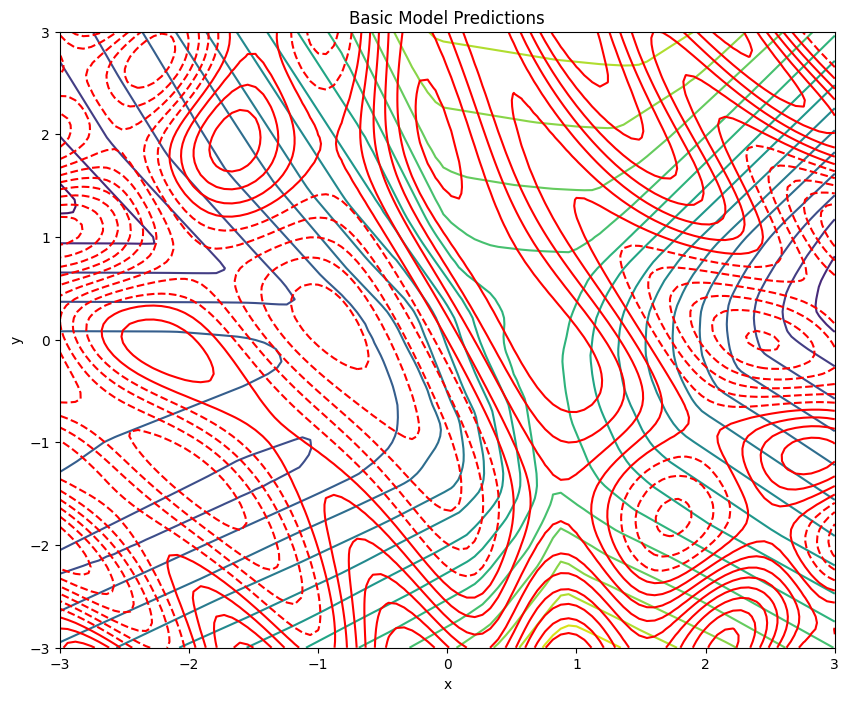

In [122]:
# Plot results
plot_predictions(basic_model, 'Basic Model Predictions')

In [123]:
# Model with augmented features
def augment_features(x, y):
    return np.column_stack([x, y, x**2, x*y, y**2])

In [124]:
X_train_aug = augment_features(x_train, y_train)

In [125]:
augmented_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

augmented_model.compile(optimizer='adam', loss='mse')

In [128]:
augmented_model.fit(X_train_aug, f_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5467 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5618 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5538 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5604 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5405 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5408 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5595 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5394 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5433 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5528 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5562  
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5349 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5539
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5520 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [129]:
# Generate data
x_train, y_train, f_train = generate_data()
X_train = np.column_stack([x_train, y_train])

# Custom model architecture
inputs = keras.Input(shape=(2,))

# Branch 1: Direct dense connection
dense1 = keras.layers.Dense(32)(inputs)

# Branch 2: Dense -> Sin
dense2 = keras.layers.Dense(32)(inputs)
sin_layer = keras.layers.Lambda(lambda x: tf.math.sin(x))(dense2)

# Branch 3: Dense -> Cos
dense3 = keras.layers.Dense(32)(inputs)
cos_layer = keras.layers.Lambda(lambda x: tf.math.cos(x))(dense3)

# Concatenate all branches
concat = keras.layers.Concatenate()([dense1, sin_layer, cos_layer])
dense_final = keras.layers.Dense(32, activation='relu')(concat)
output = keras.layers.Dense(1)(dense_final)

model = keras.Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')


In [130]:

# Train the model
history = model.fit(X_train, f_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55.5023
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.0016
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.3859
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.0181
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.1347
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.0337
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.8157
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.0328
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.4615
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.0550
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.7340
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.4649
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.2278
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.0189
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

In [131]:
# Plot predictions vs true function
def plot_predictions(model, title):
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    XY = np.column_stack([X.ravel(), Y.ravel()])
    Z = model.predict(XY).reshape(X.shape)
    f = -(X*(X-1) + Y*(1-Y)) + 12*np.cos(X*Y)*np.sin(2*X + Y)

    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=20, label='Predicted')
    plt.contour(X, Y, f, levels=20, colors='red', label='True')
    plt.colorbar(label='f(x,y)')
    plt.legend()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<ipython-input-131-ebd4db517c0f>:11: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=20, label='Predicted')
<ipython-input-131-ebd4db517c0f>:12: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, f, levels=20, colors='red', label='True')


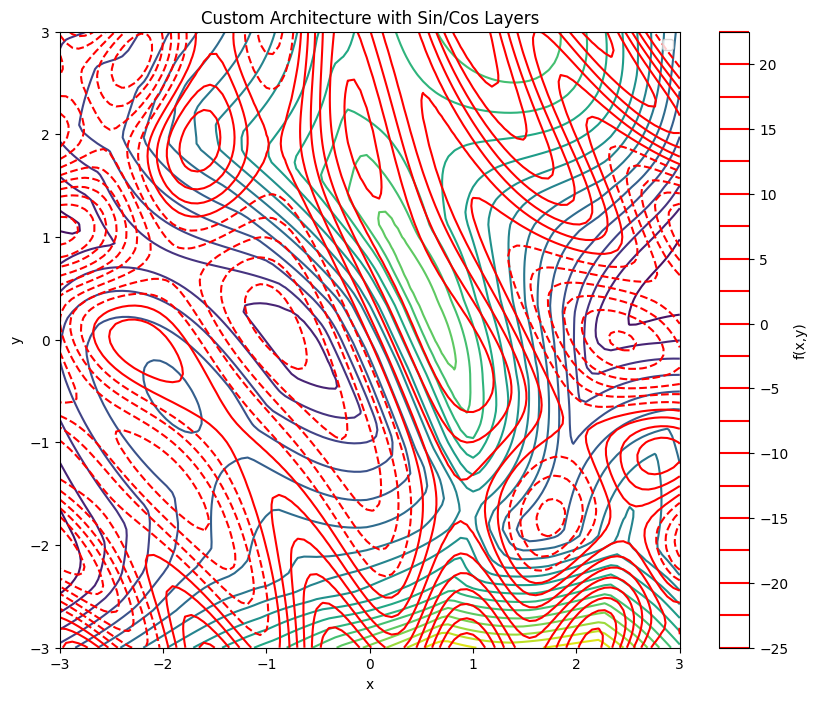

In [132]:
plot_predictions(model, 'Custom Architecture with Sin/Cos Layers')

# Question 3

In [139]:
from tensorflow.keras.datasets import fashion_mnist #to import our dataset
from tensorflow.keras.models import Sequential, Model # imports our type of network
from tensorflow.keras.layers import Dense, Flatten, Input # imports our layers we want to use

from tensorflow.python.keras.losses import categorical_crossentropy #loss function
from tensorflow.keras.optimizers import Adam, SGD #optimisers
from tensorflow.keras.utils import to_categorical #some function for data preparation

In [140]:
batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


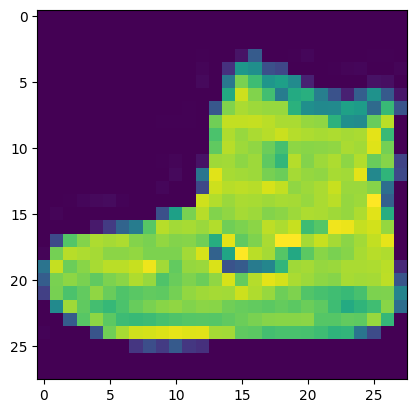

In [141]:
 print(y_train[0])

plt.imshow(x_train[0])

In [142]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(), metrics=['accuracy'])

In [143]:
history1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5607 - loss: 1.4229 - val_accuracy: 0.7530 - val_loss: 0.7677
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7719 - loss: 0.7107 - val_accuracy: 0.7876 - val_loss: 0.6486
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8010 - loss: 0.6114 - val_accuracy: 0.8012 - val_loss: 0.5953
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8144 - loss: 0.5626 - val_accuracy: 0.8122 - val_loss: 0.5643
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8216 - loss: 0.5327 - val_accuracy: 0.8178 - val_loss: 0.5436
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8272 - loss: 0.5118 - val_accuracy: 0.8206 - val_loss: 0.5283
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8315 - loss: 0.4961 - val_accuracy: 0.8239 - val_loss: 0.5163
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8354 - loss: 0.4835 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8457 - loss: 0.4440

Test loss: 0.44982436299324036
Test accuracy: 0.8399999737739563


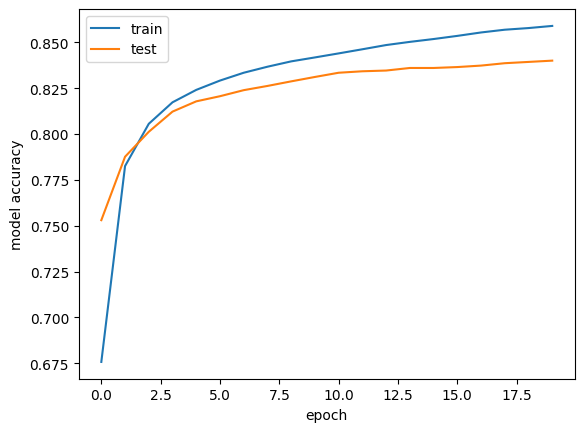

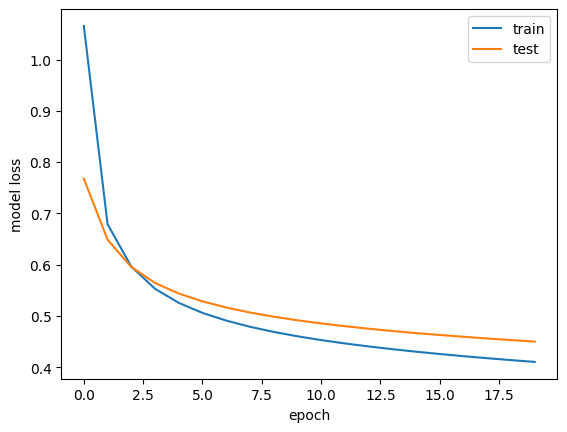

In [144]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()